In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.data import *
plt.style.use('plot.mplstyle')
%config InlineBackend.figure_format = 'retina'
from ase.io import read, write

In [20]:
test_atomistic = read("../atomistic.xyz", index=":")
test_cg = read("../coarse_grained.xyz", index=":")

In [31]:
# get the total cell energy
cell_energies = []
cell_volumes = []
all_local_energies = []
for struct in test_cg:
    zn_local_energies = struct.arrays['e_local_mofff'][struct.symbols == "Si"]
    all_local_energies.append(zn_local_energies)
    cell_energies.append(np.sum(zn_local_energies))
    cell_volumes.append(struct.get_volume())
    

In [35]:
all_local_energies = np.concatenate(all_local_energies)

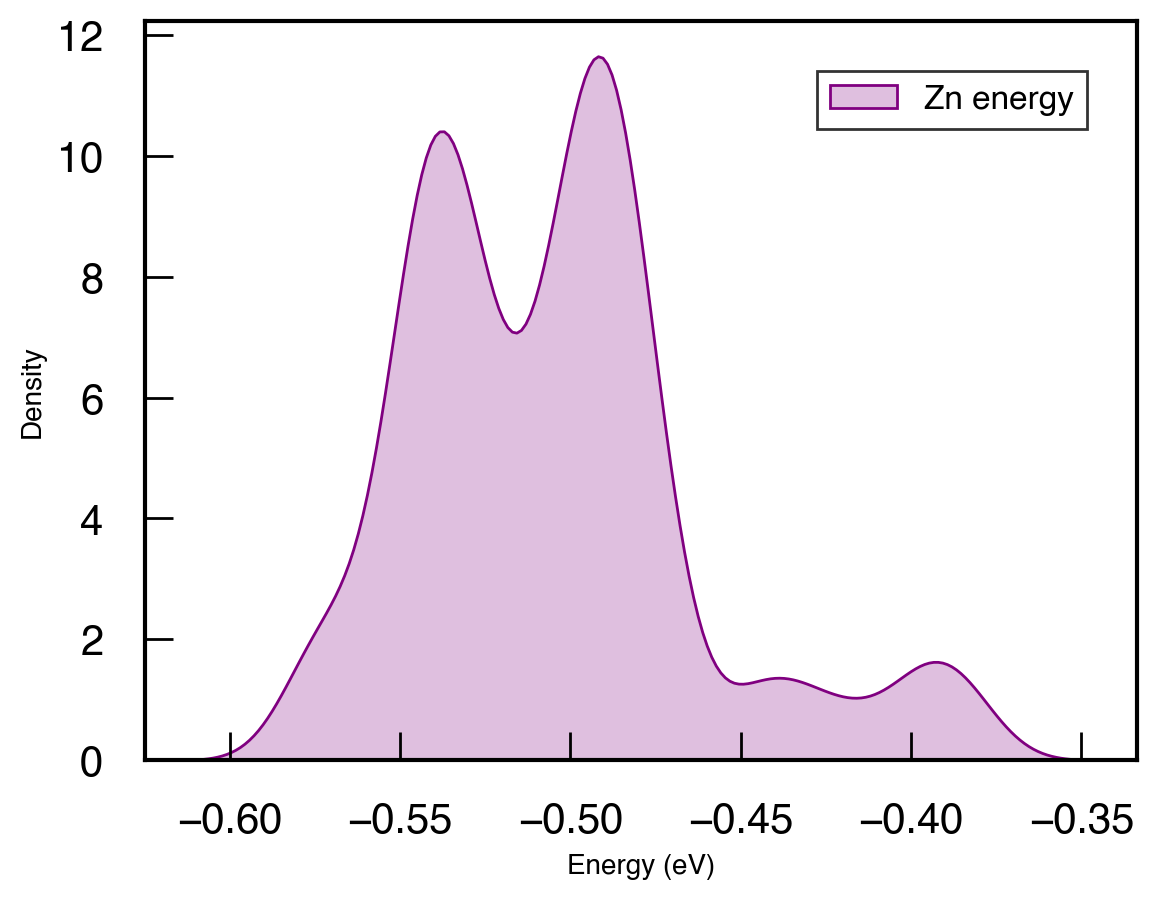

In [36]:
import seaborn as sns

sns.kdeplot(all_local_energies,fill=True,color='purple',label='Zn energy')
plt.xlabel("Energy (eV)")
plt.legend()

Text(0, 0.5, 'Total Zn$^{2+}$ energies (eV)')

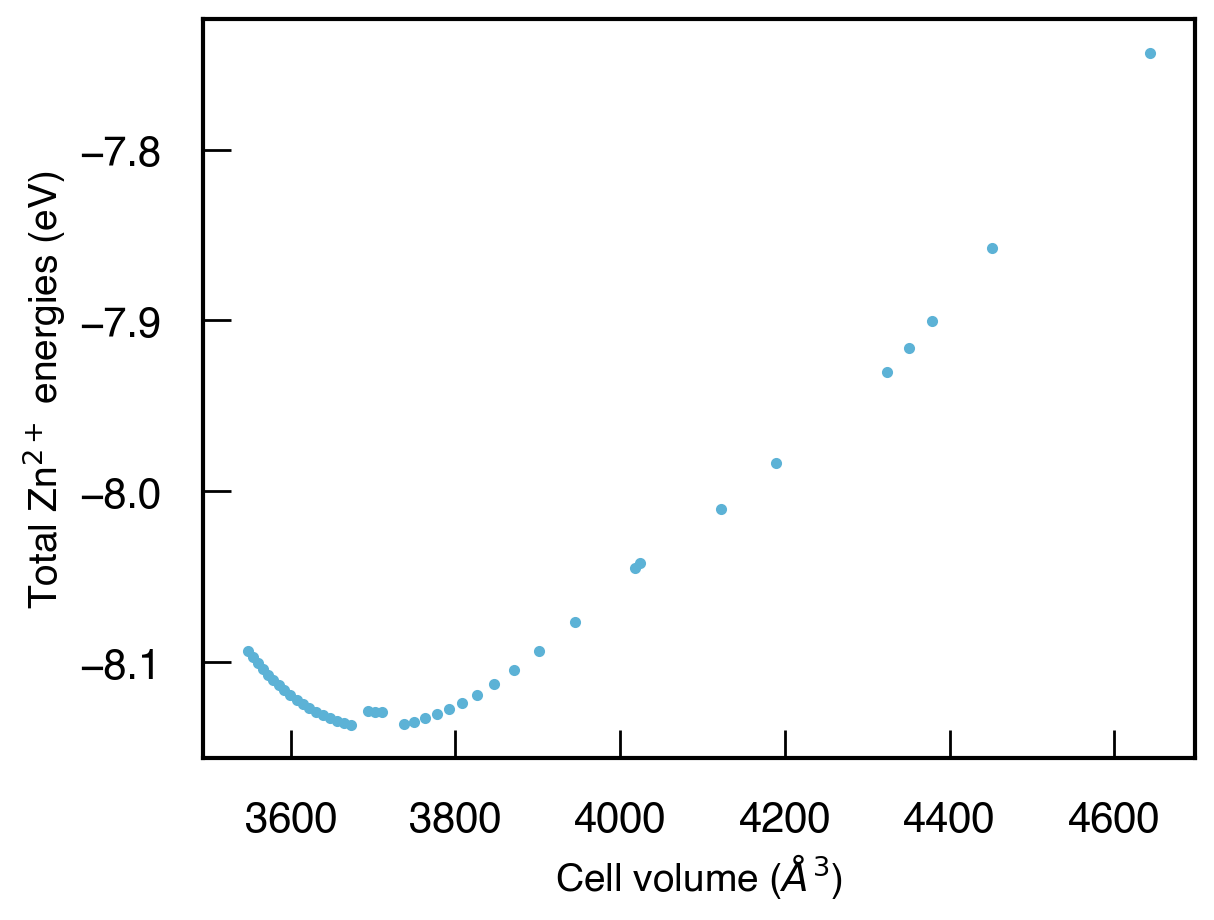

In [8]:
# plot total cell energy vs cell volume
fig,ax = plt.subplots()
ax.plot(cell_volumes,cell_energies,'o',linewidth=0,markersize=3,color='#5cb2d6')
ax.set_xlabel('Cell volume ($\AA^3$)',fontsize=14)
ax.set_ylabel('Total Zn$^{2+}$ energies (eV)',fontsize=14)


In [45]:
n_train = 10
preds = np.load(f"../modulus_preds_ntrain{n_train}.npy")

In [46]:
len(preds)

41

In [47]:
test_preds = []
for i in preds:
    test_preds.append(np.sum(i))

Text(0, 0.5, 'Total Zn$^{2+}$ energies (eV)')

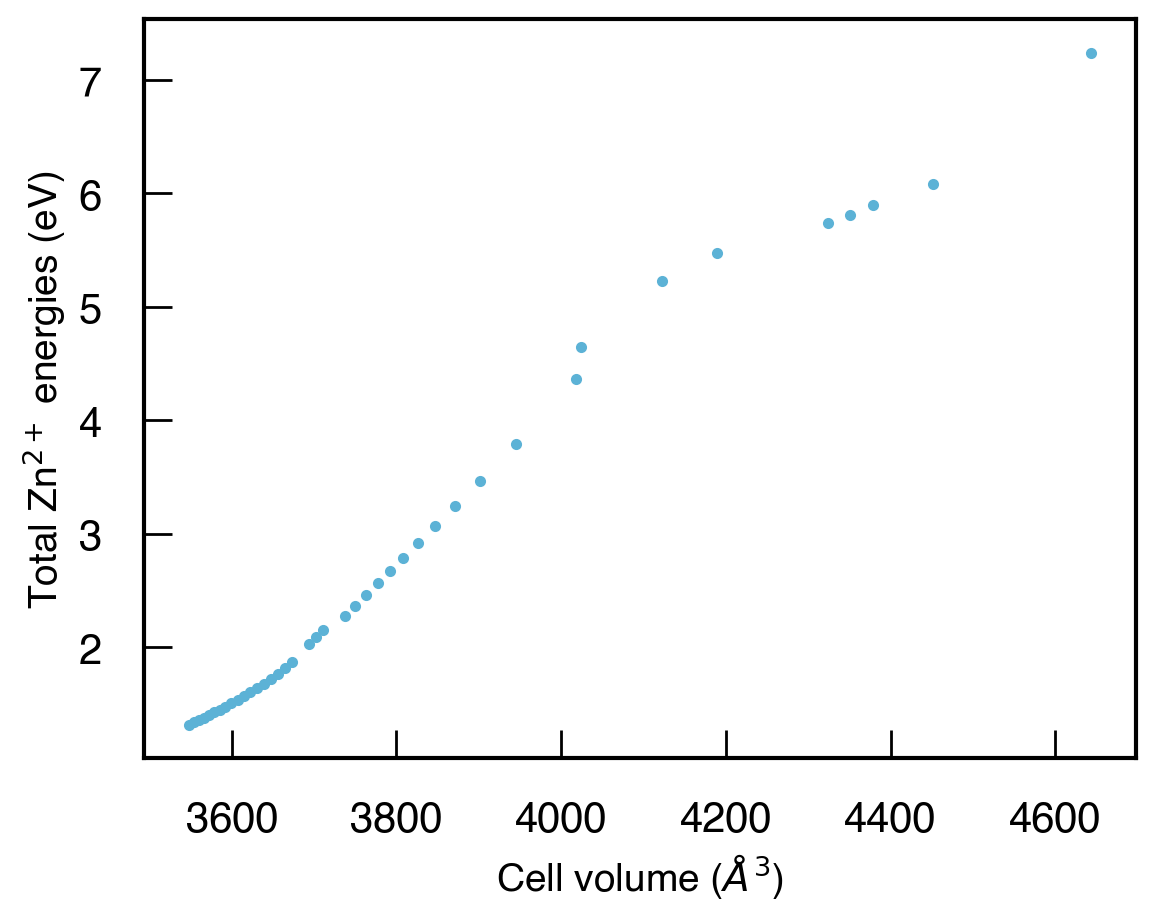

In [48]:
# plot total cell energy vs cell volume
fig,ax = plt.subplots()
ax.plot(cell_volumes,test_preds,'o',linewidth=0,markersize=3,color='#5cb2d6')
ax.set_xlabel('Cell volume ($\AA^3$)',fontsize=14)
ax.set_ylabel('Total Zn$^{2+}$ energies (eV)',fontsize=14)

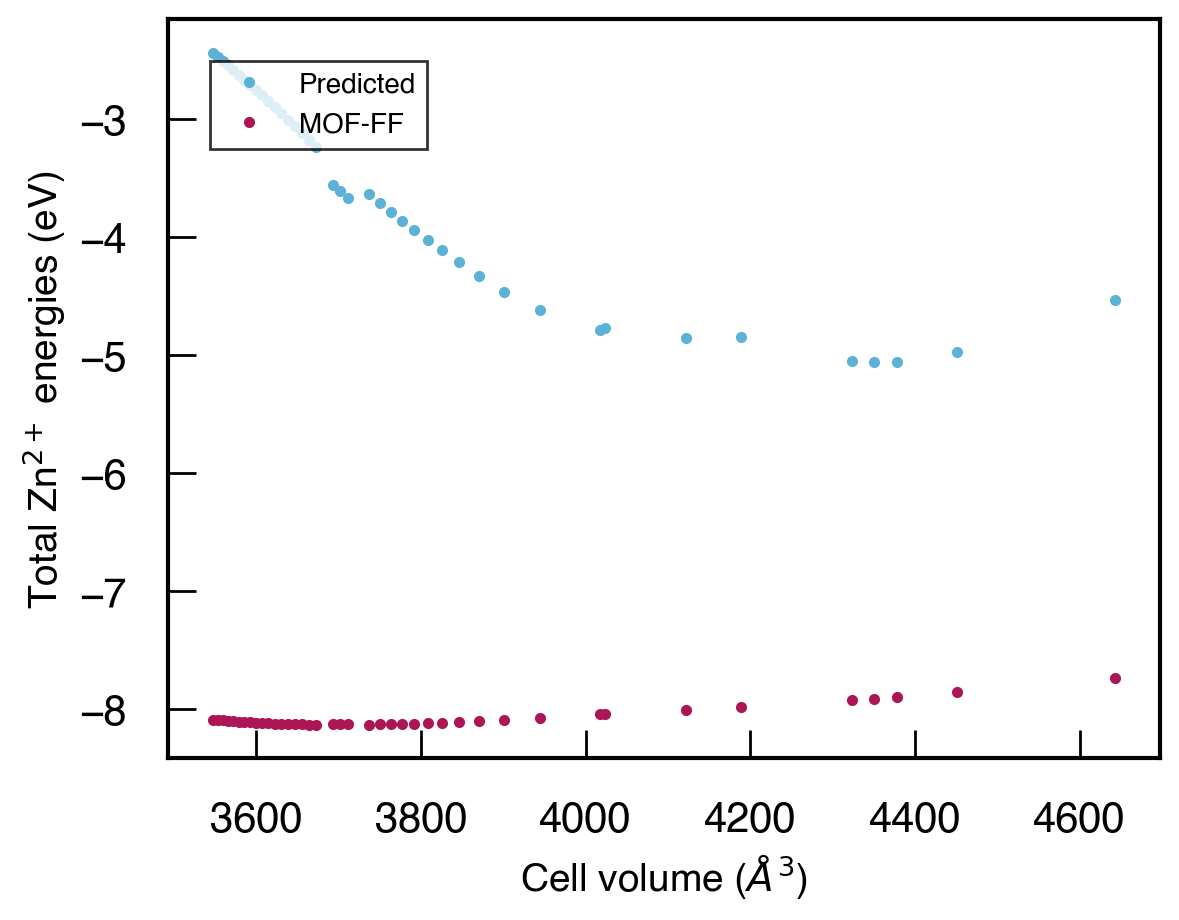

In [44]:
fig,ax = plt.subplots()
ax.plot(cell_volumes,test_preds,'o',linewidth=0,markersize=3,color='#5cb2d6',label='Predicted')
ax.plot(cell_volumes,cell_energies,'o',linewidth=0,markersize=3,color='#AD1656',label='MOF-FF')
ax.set_xlabel('Cell volume ($\AA^3$)',fontsize=14)
ax.set_ylabel('Total Zn$^{2+}$ energies (eV)',fontsize=14)
plt.legend(fontsize=10,loc='upper left')